# Predicting Term Deposit Subscription by a client

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Packages

In [ ]:
# Import basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import label encoder, chi2, model selection
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import Model and scores
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC

### Load Data

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/bank-additional-full.csv", header=None)

In [ ]:
df

,0
0,age;job;marital;education;default;housing;loan...
1,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
2,"57;""services"";""married"";""high.school"";""unknown..."
3,"37;""services"";""married"";""high.school"";""no"";""ye..."
4,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
...,...
41184,"73;""retired"";""married"";""professional.course"";""..."
41185,"46;""blue-collar"";""married"";""professional.cours..."
41186,"56;""retired"";""married"";""university.degree"";""no..."
41187,"44;""technician"";""married"";""professional.course..."


## Exploratory Data Analysis & Feature Engineering (EDA & FE)
### Treating Features Data

In [ ]:
# split column into multiple columns by delimiter
df = df[0].str.split(';', expand=True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41185,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41187,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [ ]:
# Making the 1st row as Column or features
df.columns=df.iloc[0]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41185,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41187,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [ ]:
# Keeping One duplicate Variable for handling changes in later stages
df1 = df

In [ ]:
# Row 0 is dropped
df1 = df1.drop([0])
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
5,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41185,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41187,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


### Data types

In [ ]:
df.isnull().sum()

0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# Finding the Null values in the dataset
df.isna().sum()

0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df1.dtypes

0
age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 1 to 41188
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

## Features Analysis

### Treating features data

In [ ]:
# Target variable unique values
df1['y'].unique()

array(['"no"', '"yes"'], dtype=object)

In [ ]:
df1['job'].unique()

array(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
       '"technician"', '"retired"', '"management"', '"unemployed"',
       '"self-employed"', '"unknown"', '"entrepreneur"', '"student"'],
      dtype=object)

In [ ]:
df1['y'].replace(['"no"', '"yes"'],["no", "yes"], inplace=True)

In [ ]:
df1['job'].replace(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
       '"technician"', '"retired"', '"management"', '"unemployed"',
       '"self-employed"', '"unknown"', '"entrepreneur"', '"student"'],['housemaid', 'services', 'admin', 'blue-collar',
       'technician', 'retired', 'management', 'unemployed',
       'self-employed', 'unknown', 'entrepreneur', 'student'], inplace=True)

df1['marital'].replace(['"married"', '"single"', '"divorced"', '"unknown"'],['married', 'single', 'divorced', 'unknown'], inplace=True)

df1['education'].replace(['"basic.4y"', '"high.school"', '"basic.6y"', '"basic.9y"',
       '"professional.course"', '"unknown"', '"university.degree"',
       '"illiterate"'],['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], inplace=True)

In [ ]:
df1['default'].replace(['"no"', '"unknown"', '"yes"'],['no', 'unknown', 'yes'], inplace=True)

df1['housing'].replace(['"no"', '"yes"', '"unknown"'],['no', 'yes', 'unknown'], inplace=True)

df1['loan'].replace(['"no"', '"yes"', '"unknown"'],['no', 'yes', 'unknown'], inplace=True)

df1['contact'].replace(['"telephone"', '"cellular"'],['telephone', 'cellular'], inplace=True)

df1['month'].replace(['"may"', '"jun"', '"jul"', '"aug"', '"oct"', '"nov"', '"dec"',
       '"mar"', '"apr"', '"sep"'],['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec',
       'mar', 'apr', 'sep'], inplace=True)


df1['day_of_week'].replace(['"mon"', '"tue"', '"wed"', '"thu"', '"fri"'],['mon', 'tue', 'wed', 'thu', 'fri'], inplace=True)


df1['poutcome'].replace(['"nonexistent"', '"failure"', '"success"'],['nonexistent', 'failure', 'success'], inplace=True)

In [ ]:
df1['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
df1['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
df1['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df1['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df1['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
df1['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
df1['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
df1['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

### Variable Type conversion

In [ ]:
df1.dtypes

0
age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

In [ ]:
df1["age"] = pd.to_numeric(df1.age)
df1["campaign"] = pd.to_numeric(df1["campaign"])
df1["pdays"] = pd.to_numeric(df1.pdays)
df1["previous"] = pd.to_numeric(df1.previous)
df1["emp.var.rate"] = pd.to_numeric(df1["emp.var.rate"])
df1["cons.price.idx"] = pd.to_numeric(df1["cons.price.idx"])
df1["cons.conf.idx"] = pd.to_numeric(df1["cons.conf.idx"])
df1["euribor3m"] = pd.to_numeric(df1["euribor3m"])
df1["nr.employed"] = pd.to_numeric(df1["nr.employed"])

#### Unrecognized dtypes by pandas are treated in this step, object data types converted into numeric data types

In [ ]:
df1.dtypes

0
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration           object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
for feature in df1.columns:
    if df1[feature].dtype == 'object':
        df1[feature] = pd.Categorical(df1[feature])
df1.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df1.dtypes

0
age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration          category
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

### Statistical summary

In [ ]:
df1.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Visualize features & Findings

In [ ]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df1["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

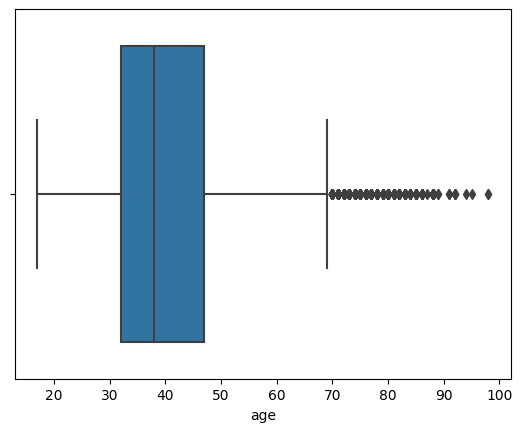

In [ ]:
#In this box plot we can observe that most of the dataset values age lies in the range of early 20's to 70 and 25th percentile around 32 and 75th percentile around 48. Median lies at 38 aproximately. above age 70, we observe some outliers, so we need to visualize further more to come to some conclusion on the same.
sns.boxplot(data=df1, x="age", hue="y");

In [ ]:
df1[df1['age']>70].count()

0
age               422
job               422
marital           422
education         422
default           422
housing           422
loan              422
contact           422
month             422
day_of_week       422
duration          422
campaign          422
pdays             422
previous          422
poutcome          422
emp.var.rate      422
cons.price.idx    422
cons.conf.idx     422
euribor3m         422
nr.employed       422
y                 422
dtype: int64

In [ ]:
df1_ = df1['age'].value_counts()
df1_.tail(20)

78    27
67    26
75    24
88    22
77    20
81    20
83    17
82    17
85    15
79    14
86     8
84     7
17     5
92     4
98     2
89     2
91     2
94     1
87     1
95     1
Name: age, dtype: int64

In [ ]:
df1_ = df1.groupby('age')['y'].count()
df1_

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: y, Length: 78, dtype: int64

In [ ]:
#We need to filter what is the percentage of people above age 70 taken term deposit.
df1[df1['age']>70]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27758,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27781,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27801,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27803,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27806,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40987,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no
40997,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41005,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df1[(df1['age']<70) & (df1['y'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
76,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
84,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
89,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
130,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
140,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41182,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df1[(df1['age']>70) & (df1['y'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27803,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27806,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27811,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27812,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27814,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,7,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40757,77,retired,married,basic.4y,no,yes,no,cellular,sep,thu,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
40934,71,retired,married,professional.course,no,no,no,cellular,oct,tue,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.982,4963.6,yes
40997,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41005,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes


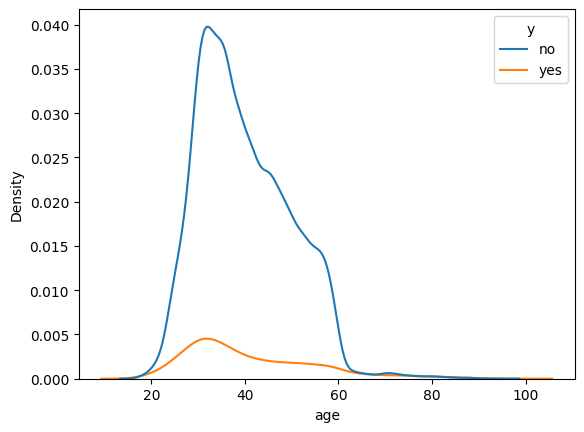

In [ ]:
sns.kdeplot(data=df1, x="age", hue="y");

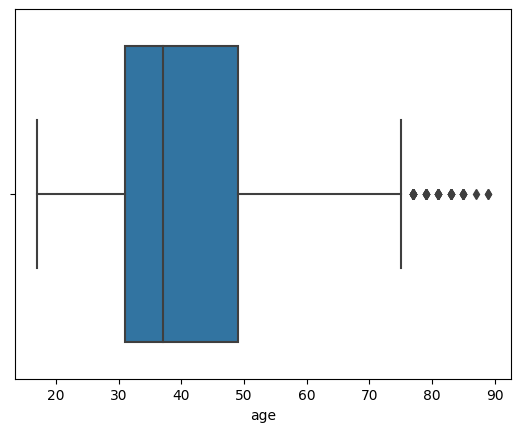

In [ ]:
df1_sub = df1[(df1["age"])&(df1["y"]=='yes')]
sns.boxplot(data=df1_sub, x="age", hue="y");

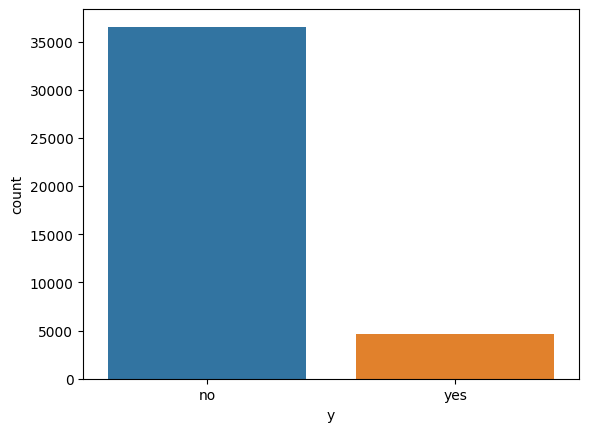

In [ ]:
sns.countplot(x="y", data=df1);

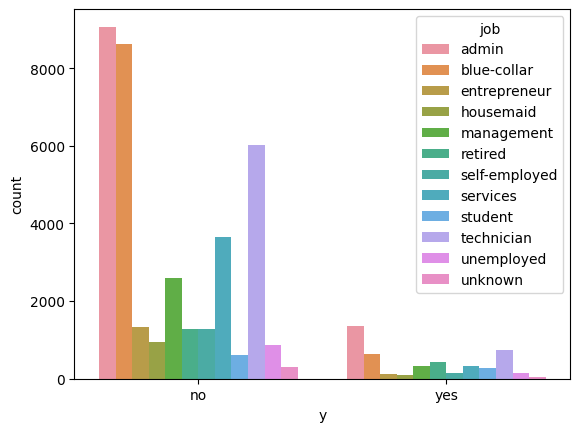

In [ ]:
sns.countplot(x="y", hue="job", data=df1);

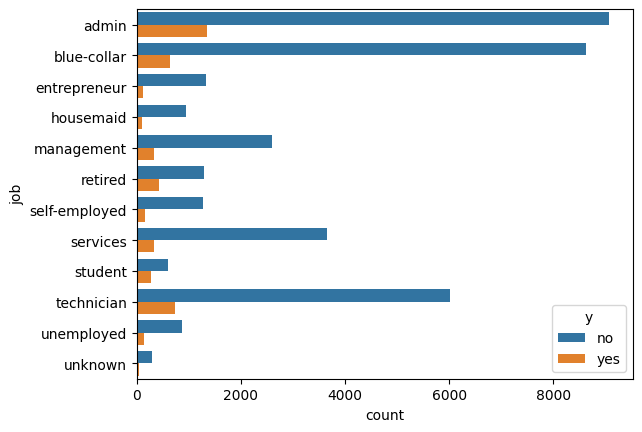

In [ ]:
sns.countplot(y="job", hue="y", data=df1);

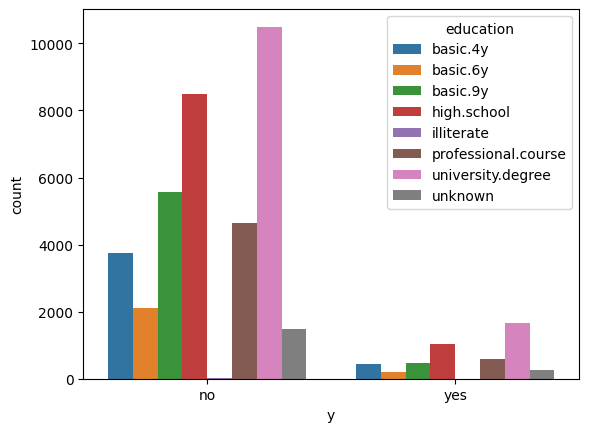

In [ ]:
sns.countplot(x="y", hue="education", data=df1);

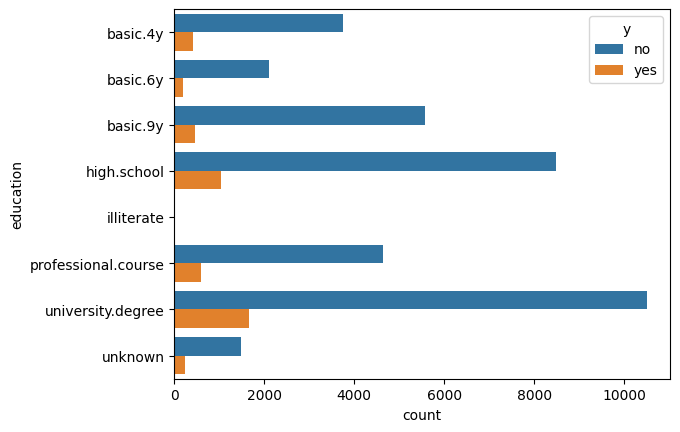

In [ ]:
sns.countplot(y="education", hue="y", data=df1);

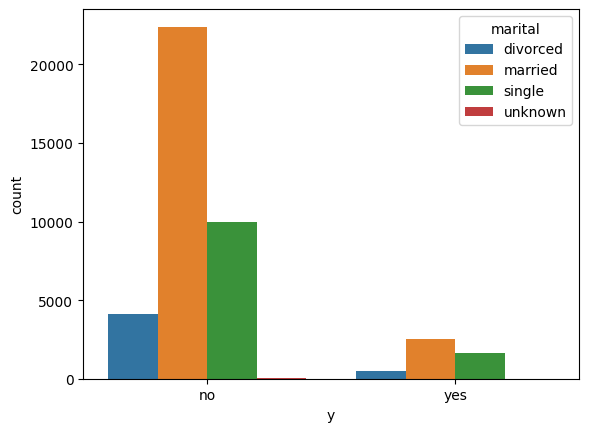

In [ ]:
sns.countplot(x="y", hue="marital", data=df1);

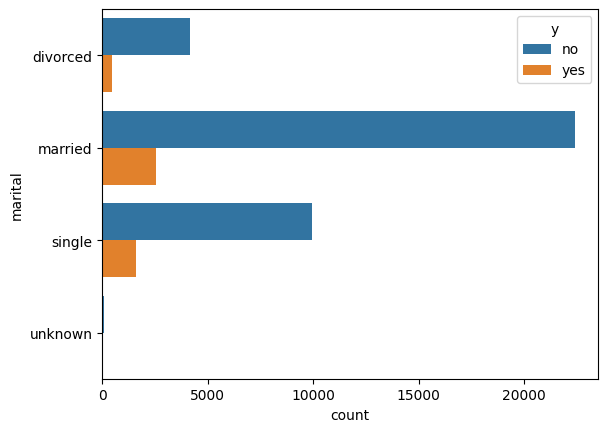

In [ ]:
sns.countplot(y="marital", hue="y", data=df1);

In [ ]:
df1[(df1['default']=='no') & (df1['housing'] == 'no')& (df1['loan'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,35,technician,married,university.degree,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
44,57,admin,married,university.degree,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
48,40,blue-collar,married,basic.9y,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41070,51,services,married,high.school,no,no,yes,cellular,nov,mon,...,2,3,4,success,-1.1,94.767,-50.8,1.050,4963.6,no
41081,27,student,single,high.school,no,no,yes,cellular,nov,tue,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.049,4963.6,no
41091,31,admin,single,university.degree,no,no,yes,cellular,nov,wed,...,2,3,6,success,-1.1,94.767,-50.8,1.048,4963.6,no
41112,46,admin,single,university.degree,no,no,yes,cellular,nov,tue,...,1,999,1,failure,-1.1,94.767,-50.8,1.046,4963.6,no


## Finding correlation between Numeric features
### Correlation between Numeric features

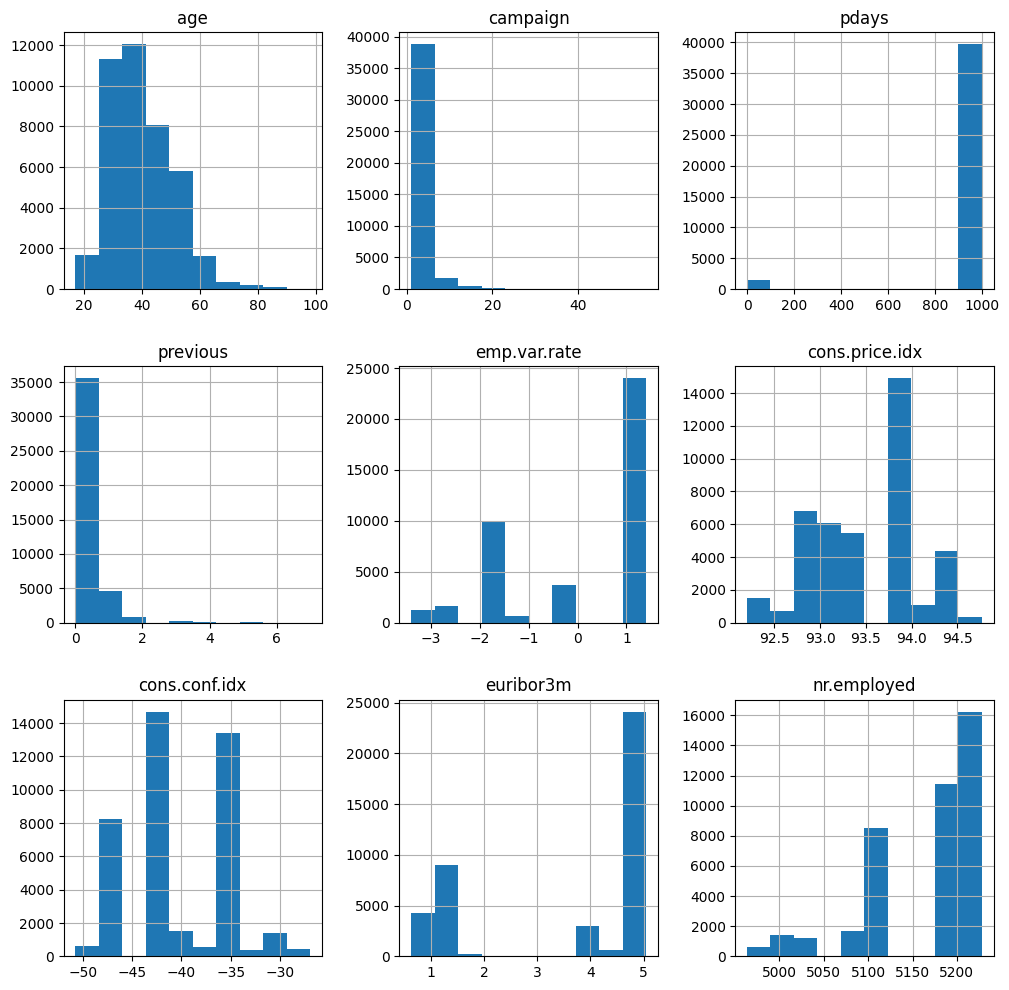

In [ ]:
df1.hist(figsize=(12,12));

In [ ]:
df1_nu_corr = df1[["age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr()
df1_nu_corr

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,,,,,,,,,
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


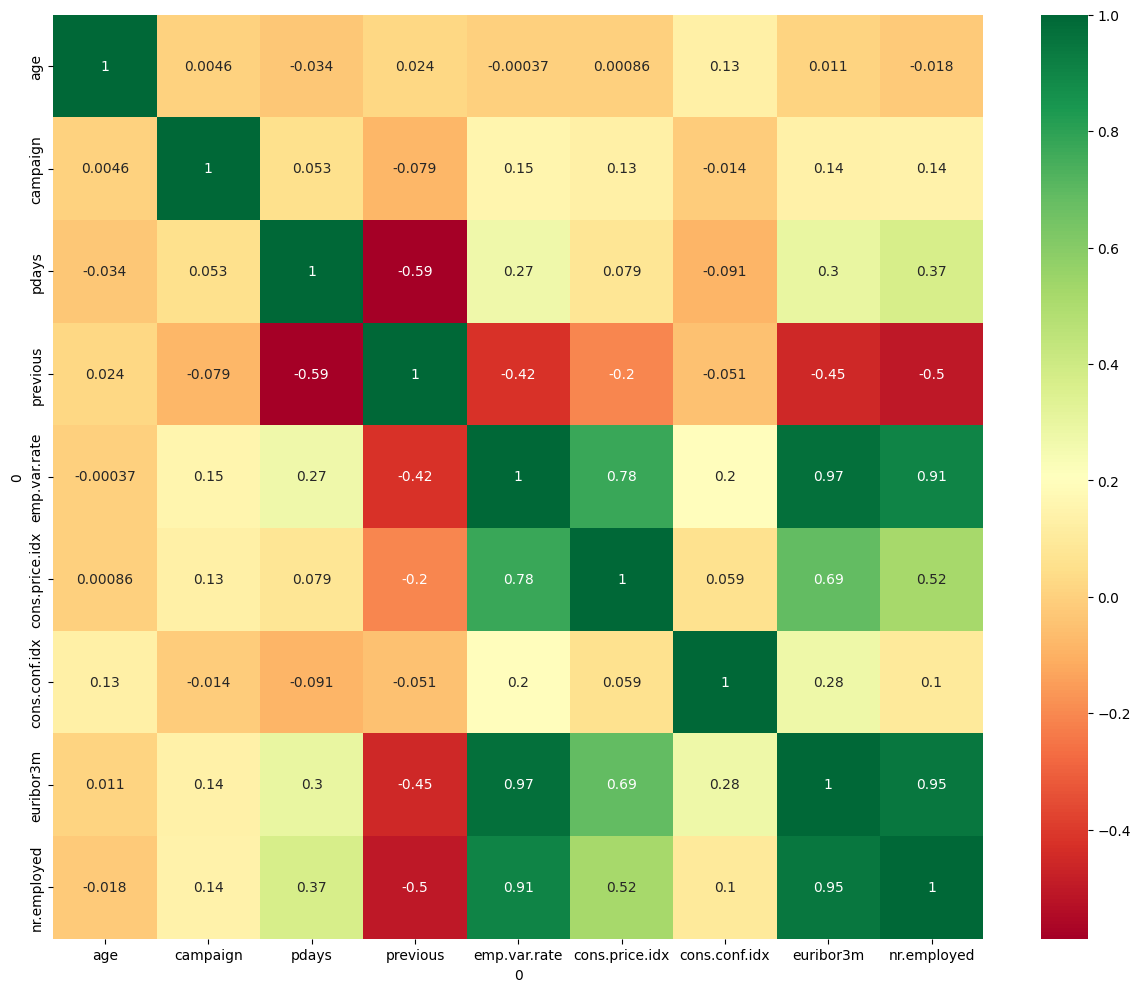

In [ ]:
fig= plt.figure(figsize=(15,12));
sns.heatmap(df1_nu_corr,annot=True,cmap="RdYlGn");
plt.show();

##  Correlation between categorical features - Chi2 Test

In [ ]:
def is_correlated(x,y):
    ct=pd.crosstab(index=df1[x], columns= df1[y])
    chi_sq_result = chi2_contingency(ct,)
    p,x = chi_sq_result[1], "correlated" if chi_sq_result[1] < 0.05 else "not-correlated"
    return p,x

In [ ]:
print("The p-value and correlation for job:", is_correlated('job','y'))
print("The p-value and correlation for marital:", is_correlated('marital','y'))
print("The p-value and correlation for education:", is_correlated('education','y'))
print("The p-value and correlation for default:", is_correlated('default','y'))
print("The p-value and correlation for housing:", is_correlated('housing','y'))
print("The p-value and correlation for loan:", is_correlated('loan','y'))
print("The p-value and correlation for contact:", is_correlated('contact','y'))
print("The p-value and correlation for day_of_week:", is_correlated('day_of_week','y'))
print("The p-value and correlation for poutcome:", is_correlated('poutcome','y'))

The p-value and correlation for job: (4.189763287563623e-199, 'correlated')
The p-value and correlation for marital: (2.068014648442211e-26, 'correlated')
The p-value and correlation for education: (3.3051890144025054e-38, 'correlated')
The p-value and correlation for default: (5.1619579513916376e-89, 'correlated')
The p-value and correlation for housing: (0.05829447669453452, 'not-correlated')
The p-value and correlation for loan: (0.5786752870441754, 'not-correlated')
The p-value and correlation for contact: (1.5259856523129964e-189, 'correlated')
The p-value and correlation for day_of_week: (2.9584820052785324e-05, 'correlated')
The p-value and correlation for poutcome: (0.0, 'correlated')


In [ ]:
df1[(df1['default']=='"yes"') & (df1['housing'] == '"no"')& (df1['loan'] == '"no"')]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [ ]:
df1[(df1['default']=='yes') & (df1['housing'] == 'yes')& (df1['loan'] == 'no')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21582,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [ ]:
df1[(df1['default']=='yes') & (df1['housing'] == 'yes')& (df1['loan'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


## Label Encoding for Target Variable

In [ ]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df1['y']= label_encoder.fit_transform(df1['y'])

df1['y'].unique()

array([0, 1])

In [ ]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
df1_nu_corr = df1[["age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]].corr()
df1_nu_corr

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,,,,,,,,,,
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


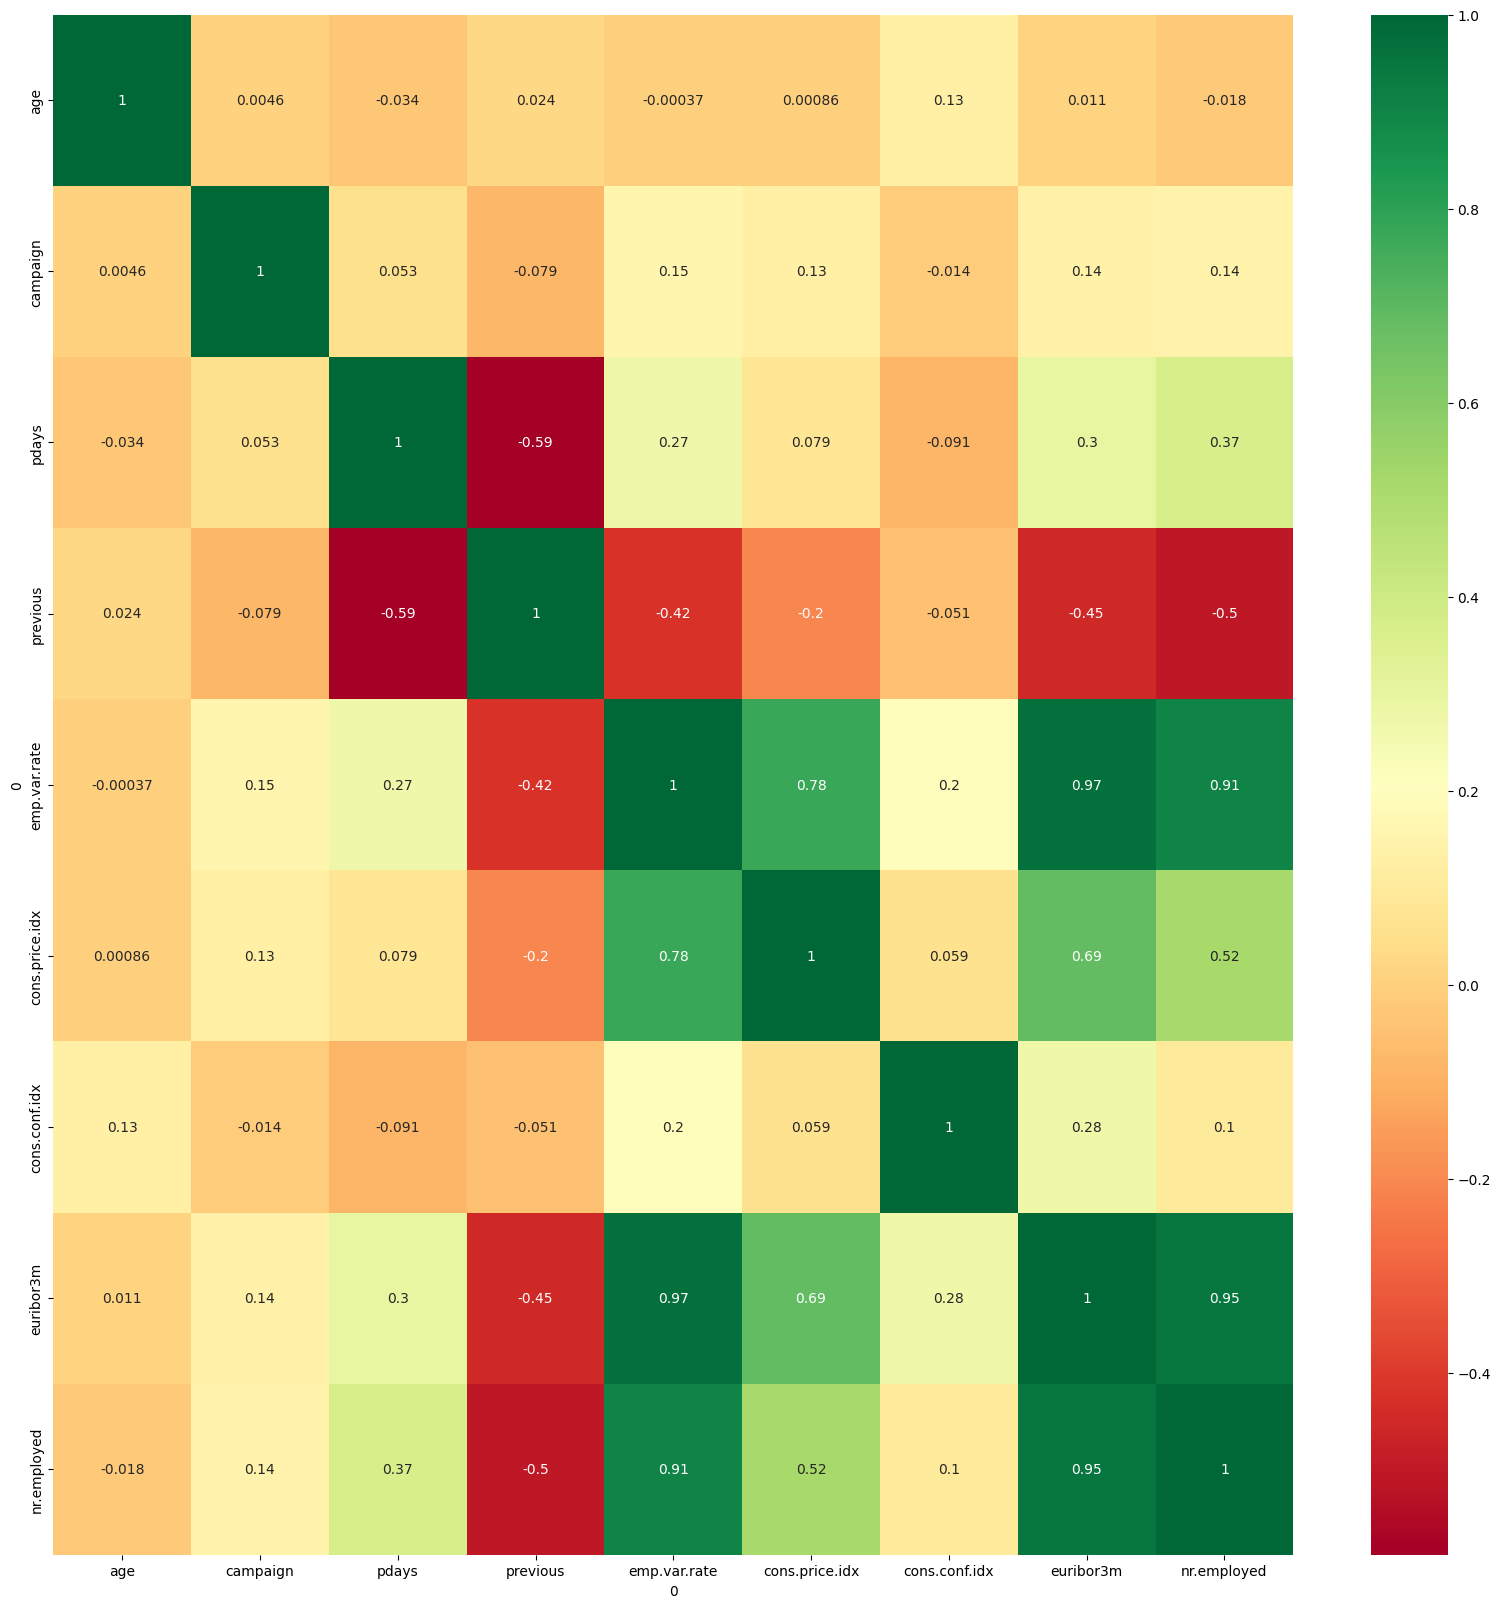

In [ ]:
fig= plt.figure(figsize=(20,20));
sns.heatmap(df1_nu_corr,annot=True,cmap="RdYlGn");
plt.show();
# RdYlGn
# BuGn_r

## Dropping features

In [ ]:
## One-hot Encoding

### To create model and evaluate, we are creating categorical features into numeric one, by using One-hot Encoding for categorical data


In [ ]:
df2=df1

In [ ]:
job_col_du = pd.get_dummies(df2['job'], prefix='job_du')
edu_col_du = pd.get_dummies(df2['education'], prefix='edu_du')
marital_col_du = pd.get_dummies(df2['marital'], prefix='marital_du')
edu_col_du = pd.get_dummies(df2['default'], prefix='default_du')
contact_col_du = pd.get_dummies(df2['contact'], prefix='contact_du')
month_col_du = pd.get_dummies(df2['month'], prefix='month_du')
day_col_du = pd.get_dummies(df2['day_of_week'], prefix='day_du')
pout_col_du = pd.get_dummies(df2['poutcome'], prefix='pout_du')

In [ ]:
df2 = pd.concat([df2, job_col_du, edu_col_du, marital_col_du, edu_col_du, contact_col_du , month_col_du, day_col_du, pout_col_du],axis=1)

In [ ]:
df2.drop(["job", "education", "marital", "default", "contact", "month", "day_of_week", "poutcome"], axis=1, inplace=True)

In [ ]:
#df2.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m'],axis=1,inplace=True)

In [ ]:
df2.drop(["housing","loan"],axis=1,inplace=True)

In [ ]:
df2.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_du_admin', 'job_du_blue-collar', 'job_du_entrepreneur',
       'job_du_housemaid', 'job_du_management', 'job_du_retired',
       'job_du_self-employed', 'job_du_services', 'job_du_student',
       'job_du_technician', 'job_du_unemployed', 'job_du_unknown',
       'default_du_no', 'default_du_unknown', 'default_du_yes',
       'marital_du_divorced', 'marital_du_married', 'marital_du_single',
       'marital_du_unknown', 'default_du_no', 'default_du_unknown',
       'default_du_yes', 'contact_du_cellular', 'contact_du_telephone',
       'month_du_apr', 'month_du_aug', 'month_du_dec', 'month_du_jul',
       'month_du_jun', 'month_du_mar', 'month_du_may', 'month_du_nov',
       'month_du_oct', 'month_du_sep', 'day_du_fri', 'day_du_mon',
       'day_du_thu', 'day_du_tue', 'day_du_wed', 'pout_du_failure',
       'pout_du_nonexistent

## Support Vector Mechine (SVM) - Model

### SVM using Linear Kernal

In [ ]:
x= df2.drop('y',axis=1)
y= df2['y']

##  SVM Linear Model Test Size 0.2

### Training model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model1=SVC(kernel ='linear')

# training set in x, y axis
result1=model1.fit(x_train,y_train)
y_pred1=result1.predict(x_test)

In [ ]:
print("For test size:0.2, Accuracy Of SVM: ", accuracy_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

For test size:0.2, Accuracy Of SVM:  0.8969410050983249
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7331
           1       0.53      0.54      0.54       907

    accuracy                           0.90      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.90      0.90      0.90      8238



## SVM Linear Model Test Size 0.25

### Training model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model2=SVC(kernel ='linear')

# training set in x, y axis
result2=model2.fit(x_train,y_train)
y_pred2=result2.predict(x_test)

In [ ]:
print("For test size:0.25, Accuracy Of SVM: ", accuracy_score(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

For test size:0.25, Accuracy Of SVM:  0.9017189472661941
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      9848
           1       0.25      0.65      0.37       449

    accuracy                           0.90     10297
   macro avg       0.62      0.78      0.66     10297
weighted avg       0.95      0.90      0.92     10297



## SVM Linear Model Test Size 0.30

### Training Model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model3=SVC(kernel ='linear')

# training set in x, y axis
result3=model3.fit(x_train,y_train)
y_pred3=result3.predict(x_test)

In [ ]:
print("For test size:0.3, Accuracy Of SVM: ", accuracy_score(y_pred3,y_test))
print(classification_report(y_pred3,y_test))

For test size:0.3, Accuracy Of SVM:  0.9041029376062151
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     11855
           1       0.25      0.69      0.37       502

    accuracy                           0.90     12357
   macro avg       0.62      0.80      0.66     12357
weighted avg       0.96      0.90      0.92     12357



## SVM using kernal

### Training model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model4 = SVC(kernel ='rbf', random_state = 0)

# training set in x, y axis
result4 = model4.fit(x_train, y_train)
y_pred4=result4.predict(x_test)

In [ ]:
print("For test size:0.25, Accuracy Of SVM kernal: ", accuracy_score(y_pred4,y_test))
print(classification_report(y_pred4,y_test))

For test size:0.25, Accuracy Of SVM kernal:  0.8972516266873847
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      9882
           1       0.23      0.65      0.34       415

    accuracy                           0.90     10297
   macro avg       0.61      0.78      0.64     10297
weighted avg       0.95      0.90      0.92     10297



## SVM using sigmoid kernal

### Training model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model5 = SVC(kernel ='sigmoid')

# training set in x, y axis
result5 = model5.fit(x_train, y_train)
y_pred5=result5.predict(x_test)

In [ ]:
print("For test size:0.25, Accuracy Of SVM sigmoid kernal: ", accuracy_score(y_pred5,y_test))
print(classification_report(y_pred5,y_test))

For test size:0.25, Accuracy Of SVM sigmoid kernal:  0.8987083616587356
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      9897
           1       0.23      0.67      0.34       400

    accuracy                           0.90     10297
   macro avg       0.61      0.79      0.64     10297
weighted avg       0.96      0.90      0.92     10297



## SVM using Polynomial kernal

### Training model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model6 = SVC(kernel ='poly')

# training set in x, y axis
result6 = model6.fit(x_train, y_train)
y_pred6=result6.predict(x_test)

In [ ]:
print("For test size:0.25, Accuracy Of SVM sigmoid kernal: ", accuracy_score(y_pred6,y_test))
print(classification_report(y_pred6,y_test))

For test size:0.25, Accuracy Of SVM sigmoid kernal:  0.8972516266873847
              precision    recall  f1-score   support

           0       0.99      0.91      0.94      9910
           1       0.22      0.66      0.32       387

    accuracy                           0.90     10297
   macro avg       0.60      0.78      0.63     10297
weighted avg       0.96      0.90      0.92     10297



##  SVM using Polynomial kernal with degree of polynomial = 2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)
print('x train data {}'.format(x_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(x_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (28831, 52)
y train data (28831,)
x test data  (12357, 52)
y test data  (12357,)


## **Scaling**

In [ ]:
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(x_test)

X_train = X_train_scaled
X_test  = X_test_scaled

In [ ]:

model7 = SVC(kernel ='poly', degree = 2)

# training set in x, y axis
result7 = model7.fit(X_train, y_train)
y_pred7=result7.predict(X_test)

In [ ]:
print("For test size:0.25, Accuracy Of SVM sigmoid kernal: ", accuracy_score(y_pred7,y_test))
print(classification_report(y_pred7,y_test))

For test size:0.25, Accuracy Of SVM sigmoid kernal:  0.9073399692481994
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     11796
           1       0.28      0.67      0.40       561

    accuracy                           0.91     12357
   macro avg       0.63      0.80      0.67     12357
weighted avg       0.95      0.91      0.92     12357



## **Converting to Pickle file**

In [ ]:
import pickle

In [ ]:
with open('prediction.pkl','wb') as file:
  pickle.dump(result7,file)